<img src="logo-catedra.png" width="400"> <img src="Logo-GIIATa-small.png" width="100"> 
<div style="text-align: right"> _Por: V. Robles B._ </div>

# Descenso por Gradiente: una breve introducción - Parte 2

En este cuaderno se presenta un ejemplo sobre cómo aplicar el método de descenso por gradiente en el caso de que tengamos una función con dos incógnitas, es decir, cuando se $f$ depende de dos variables: $f(x,y)$.

Recuerde que en diversos textos también se representa esta función de la siguiente forma: $f(x_{1}, x_{2})$.

La forma de realizar el cálculo es la misma, sin embargo, ahora en lugar de tener una línea, tendremos un plano por el cual nos moveremos en búsqueda de minimizar la función dada.




## Ejemplo de aplicación:

En el siguiente ejemplo vamos a ver cómo aplicar el algoritmo de descenso por gradiente para minimizar esta función que tiene dos incógnitas, asumiendo que el punto de partida es $x^{(0)}=(2,3)$:

$f(x,y)=x^{3}+x y+y^{3}+3.3$

Para ello, procedemos a realizar una gráfica de la función a través de la librería de utilidades de **matplotlib** (_mpl_toolkits.mplot3d_) a fin de tener una idea más clara de cómo se representa dicha función:

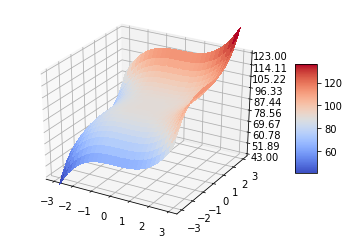

In [54]:
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

%matplotlib inline

def fxy(x,y):
    return (np.power(x,3.)+np.dot(x,y)+np.power(y,3.)+3.3)


fig=pp.figure()
#fig.set_size_inches(17.,10.)
axes=fig.gca(projection='3d')

x=np.arange(-3.,3.,0.23)
y=np.arange(-3.,3.,0.23)

x, y = np.meshgrid(x,y) # creamos la malla
z=fxy(x,y)

# Dibujamos la superficie
surface=axes.plot_surface(x,y,z,cmap=cm.coolwarm,linewidth=0,antialiased=False)

axes.set_zlim(43.,123.)
axes.zaxis.set_major_locator(LinearLocator(10))
axes.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surface, shrink=0.5, aspect=5)
pp.show()

#print(x,"\n",y,"\n")
#print(z)

#pp.plot(x,y)
#pp.grid(True)
#pp.show()

### Resolución usando el método de Descenso por Gradiente [3]:

Dado que no conocemos el valor óptimo de $x$, hacemos $k\leftarrow 0$, como nos indica el algoritmo. A continuación procedemos a calcular los siguientes elementos:

* La derivada **parcial** de la función original $f(x,y)=x^{3}+x y+y^{3}+3.3$.
* Evaluamos la función original en el punto $x^{(0)}=(2,3)$.


In [55]:
from sympy import Function, Symbol, diff, solve

x=Symbol('x')
y=Symbol('y')
f=Function('f')(x)

fx=x**3+x*y+y**3+3.3

fpx=diff(fx,x)
fpy=diff(fx,y)
print("[",fpx,",",fpy,"]")

print("Valor en el punto (x^(0),y^(0)) => (2,3) = ",fx.subs(x,2.).subs(y,3.).evalf())

[ 3*x**2 + y , x + 3*y**2 ]
Valor en el punto (x^(0),y^(0)) => (2,3) =  44.3000000000000


Lo que nos da como resultado los siguientes valores:

$\nabla f(x,y) =  \binom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}= \binom{3x^{2}+y}{x+3y^{2}} $

$\nabla f\left((x^{(0)},y^{(0)}) = (2,3)\right) = 44.3$


1. Ahora buscaremos encontrar el siguiente punto con coordenadas $\left(x^{(k+1)}, y^{(k+1)}\right)$, para ello debemos calcular:
<div style="text-align:center">
    <br />$\left(x^{(1)},y^{(1)}\right)=(x^{(0)},y^{(0)})-t^{*}_{0} \nabla f(x^{(0)},y^{(0)})$ <br />
    <br />
</div>
2. Para encontrar el valor de $t^{*}_{0}$, debemos hallar el mínimo de la función $\theta(t) = f(x^{(0)},y^{(0)})-t \nabla f(x^{(0),y^{(0)}}$. Para realizar este paso, buscamos en el punto estacionario trabajando con la derivada de la función a minimizar. En este punto, usaremos una notación vectorial:

  - Para esto, calculamos el valor de $t^{*}_{k}$ empleando el punto $x^{(0)}$, y la función de $t$ y en base a la derivada de la función a minimizar:
<div style="text-align:center">
    <br />$\theta^{'}(t)=-\nabla f\left( (x^{(0)},y^{(0)} )- t \nabla f(x^{(0)},y^{(0)}) \right) \nabla f(x^{(0)},y^{(0)})$ <br/ >
    <br />$=-\nabla f\left( (2,3)- t \nabla f(2,3)  \right) \nabla f(x^{(0)},y^{(0)})$ <br/ >
</div>   
   Para hallar $\nabla f(x^{(0)},y^{(0)})$, simplemente sustituimos el punto $(2,3)$ en ambas partes de la función original que se derivó con respecto a $x$ y con respecto a $y$:
   
<div style="text-align:center">
   <br/ >$\nabla f(x^{(0)},y^{(0)}) = \binom{3x^{2}+y}{x+3y^{2}}$ <br/ >
   <br/ >$\nabla f(2,3) = \binom{3\cdot 2^{2}+3}{2+3\cdot 3^{2}}$ <br/ >
   <br/ >$\nabla f(2,3) = (15, 29)$ <br/ >
</div>

   Con ello, ahora volvemos a la función $\theta^{'}(t)$ y reemplazamos el valor calculado:
<div style="text-align:center">
    <br />$=-\nabla f\left( (2,3)- t (15,29)  \right) (15,29)$ <br/ >
    <br />$=-\nabla f\left( (2-15t),(3-29t) \right) (15,29)$ <br/ >
</div>   
   Ahora, evaluamos la función que derivamos con los nuevos valores $x=(2-15t), y=(3-29t)$:
<div style="text-align:center">
    <br />$=-\left( 3\cdot (2-15t)^{2}+(3-29t), (2-15t)+3\cdot (3-29t)^{2} \right) (15,29)$ <br/ >
    <br />$=-\lbrace{ 15\left( 3\cdot (2-15t)^{2}+(3-29t)\right)+29\left( (2-15t)+3\cdot (3-29t)^{2} \right) \rbrace}$ <br/ >
 <br/ >
</div>   
   Factoramos con ayuda de **sympy** y buscamos las raíces:
   

In [56]:
t=Symbol('t')
ft=Function('ft')(t)

fnabla=-(15.*(3.*(2.-15.*t)**2+(3.-29.*t))+29.*((2.-15.*t)+3*(3.-29.*t)**2))

print(fnabla.expand())

fnablap=fnabla.diff(t)


print("Derivada para buscar raices: ",fnablap)
print("Raices: [",solve(fnablap),"]")

-83292.0*t**2 + 18708.0*t - 1066.0
Derivada para buscar raices:  -166584.0*t + 18708.0
Raices: [ [0.112303702636508] ]


   Con ello, nuestra ecuación en función de $t$ queda como sigue:
<div style="text-align:center">
    <br />$=-83292t^{2} + 18708t - 1066$<br/ >
</div>   
   Y la raíz que encontramos luego de derivarla (ya que nos salen valores imaginarios) es $t_{0}=0.1123$. <br /> <br />
   
   
3. Dado lo anterior, el siguiente punto $(x^{(1)},y^{(1)})$ será:
<div style="text-align:center">
    <br />$(x^{(1)},y^{(1)})=(x^{(0)},y^{(0)})-t^{*}_{0} \nabla f(x^{(0)},y^{(0)})$ <br/ >
    <br />$(x^{(1)},y^{(1)})=(2,3)-0.1123\cdot (15, 29)$ <br/ >
    <br />$(x^{(1)},y^{(1)})=(0.3155, -0.25669)$ <br/ >
</div>

Si ahora evaluamos la función original con el nuevo punto $(x^{(1)},y^{(1)})=(0.3155, -0.25669)$, obtenemos obtendremos lo siguiente:

In [57]:
print("Valor en el punto (x^(1),y^(1)) => (0.3155,-0.25669) = ",fx.subs(x,0.3155).subs(y,-0.25669).evalf())

Valor en el punto (x^(1),y^(1)) => (0.3155,-0.25669) =  3.23350601238169


 Como se aprecia, tenemos un valor menor, es decir, se ha minimizado la función: $f(x,y)=x^{3}+x y+y^{3}+3.3$.
 Deberemos seguir repitiendo los pasos, hasta que el error obtenido sea menor al planteado en $\epsilon$.

## Boletín de prácticas 2
### Objetivos:
* Familiarizarse con los principales aspectos y etapas del método de descenso por gradiente para funciones que dependen de dos variables $f(x,y)$.
* Conocer cómo aplicar el proceso de descenso por gradiente de forma automatizada con soporte de **sympy** y **Jupyter Notebook*.

### Enunciado:

1. Seleccionar una función matemática $f(x,y)$ para realizar el proceso de minimización. Ejecutar al menos **3 pasos** del método de descenso por gradiente. 
2. Diseñar y desarrollar un cuaderno en Jupyter Notebook donde se realicen todos los pasos correspondientes al proceso de minimización de la función a través del método de descenso por gradiente.
3. El cuaderno deberá incluir los siguientes puntos:
    1. Gráfica de la función y los puntos que se obtienen a medida que se ejecutan los pasos de cálculo (hasta $k=3$).
    2. Aplicación de las funciones de derivación y evaluación de forma similar a la que se ha detallado en el presente cuaderno.
    3. Incluir un acápite sobre las funciones cóncavas y los puntos estacionarios (incluir gráficos).
    4. Emplear las funcionalidades que proveen los paquetes **matplotlib** y **sympy**.

  
### Criterios de evaluación:
Los criterios o rúbrica de evaluación del Boletín de Prácticas 2 son los siguientes:
1. Adecuada complejidad de la función seleccionada para el proceso de minimización (procurar no usar funciones cóncavas).
2. Mejorar la gráfica en 3D presentada en este cuaderno.
3. Correcta explicación y detalle de cada paso ejecutado con el método de descenso por gradiente.
4. Verificación de la solución encontrada.
5. Elementos extra: incluye recta (flecha) con la dirección del gradiente, animaciones, etc.
6. Ejecutar los pasos indicados en el segundo video-tutorial.

### Prerrequisitos:
A fin de poder realizar esta práctica, deberá contar con los siguientes prerrequisitos:
1. Haber leído de forma completa el presente cuaderno.
2. Tener instalados los siguientes paquetes en su computador:
    1. Python 2.7+ (de preferencia 3.6+)
    2. [Sympy](http://www.sympy.org)
    3. [matplotlib](https://matplotlib.org/)


### Detalles de la entrega:
El cuaderno de Jupyter Notebook deberá ser cargado en el AVAC con todos los recursos necesarios (imágenes, enlaces, etc.) en un archivo comprimido, dentro de la tarea **Boletín de Prácticas 2: Descenso por gradiente f(x,y)**. Los detalles de la fecha y hora de entrega se encuentran especificados en el AVAC.


### Algunos enlaces de utilidad:
A continuación se presentan algunos enlaces que pueden resultar de utilidad:
* Wiki con algunas funciones básicas de la librería [sympy](https://github.com/sympy/sympy/wiki/Quick-examples)
* Un tutorial interactivo con ejemplos de técnicas de [optimización](http://www.benfrederickson.com/numerical-optimization/).

### Vídeos complementarios: 
A continuación se presenta un listado de vídeos de interés para reforzar los conceptos vistos en clase:
* Vídeo tutorial introductorio al método de descenso por gradiente <br /><br /> [![Vídeo descenso por gradiente](https://img.youtube.com/vi/A6FiCDoz8_4/0.jpg)](https://youtu.be/A6FiCDoz8_4)<br />
* Vídeo tutorial - Práctico con Jupytper Notebook sobre descenso por gradiente<br /><br /> [![Vídeo descenso por gradiente](https://img.youtube.com/vi/-_A_AAxqzCg/0.jpg)](https://www.youtube.com/watch?v=-_A_AAxqzCg) 

## Referencias
1. [Nedrich Matt, An Introduction to Gradient Descent and Linear Regression, Atomic Object, 2014.](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)
2. [Renjie Liao, CSC 411 Tutorial: Optimization for Machine Learning, Torondo University, 2016.](https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/tutorial2.pdf)
3. [Singer Yaron, Advanced Optimization: Lecture 9, Harvard University, 2016](https://people.seas.harvard.edu/~yaron/AM221-S16/lecture_notes/AM221_lecture9.pdf)